/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



Results for K-means:
Cluster assignments:
CFR1: Cluster 0
CFR14: Cluster 1
CFR12: Cluster 1
CFR16: Cluster 1
CFR13: Cluster 1
CFR3: Cluster 2
CFR21: Cluster 0
CFR19: Cluster 0
CFR8: Cluster 0
CFR20: Cluster 0
UKCFR: Cluster 0
CFR2: Cluster 0
CFR10: Cluster 0
CFR6: Cluster 1
CFR18: Cluster 1
CFR9: Cluster 0
CFR17: Cluster 1
CFR22: Cluster 0
CFR5: Cluster 1
CFR4: Cluster 0
CFR11: Cluster 1
CFR7: Cluster 1
CFR15: Cluster 0


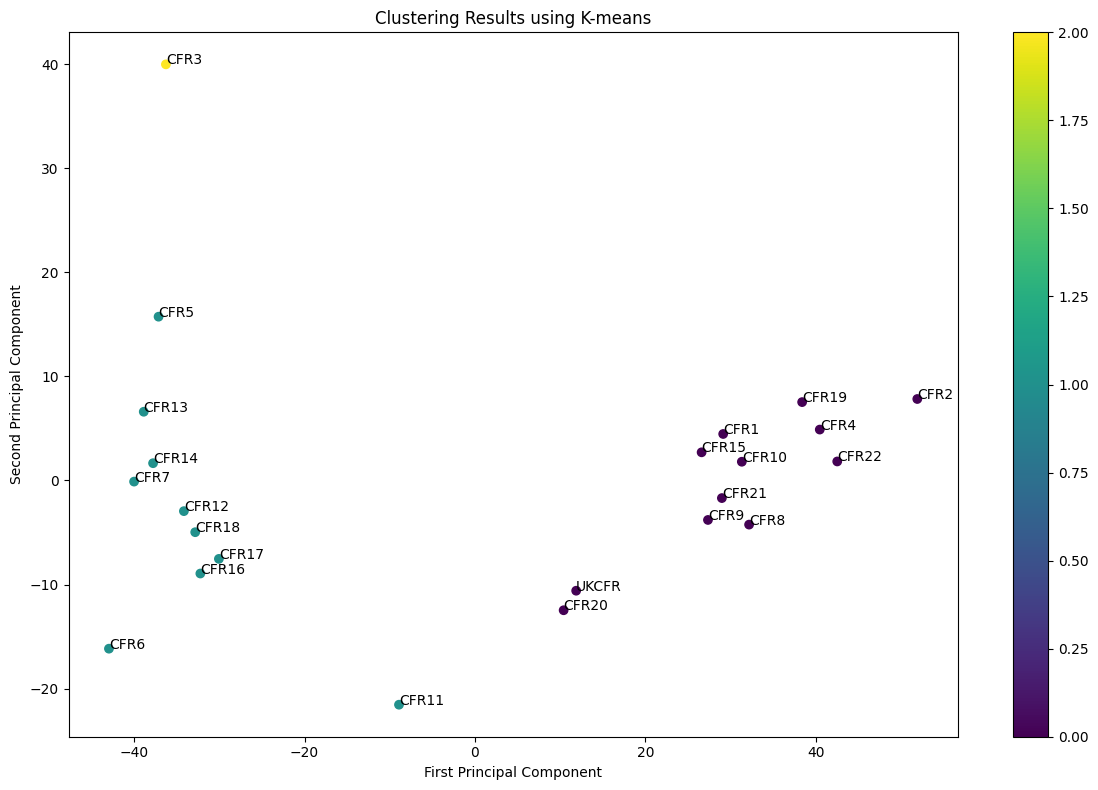

Silhouette Score for K-means: 0.539

Results for DBSCAN:
Cluster assignments:
CFR1: Cluster -1
CFR14: Cluster -1
CFR12: Cluster -1
CFR16: Cluster -1
CFR13: Cluster -1
CFR3: Cluster -1
CFR21: Cluster -1
CFR19: Cluster -1
CFR8: Cluster -1
CFR20: Cluster -1
UKCFR: Cluster -1
CFR2: Cluster -1
CFR10: Cluster -1
CFR6: Cluster -1
CFR18: Cluster -1
CFR9: Cluster -1
CFR17: Cluster -1
CFR22: Cluster -1
CFR5: Cluster -1
CFR4: Cluster -1
CFR11: Cluster -1
CFR7: Cluster -1
CFR15: Cluster -1


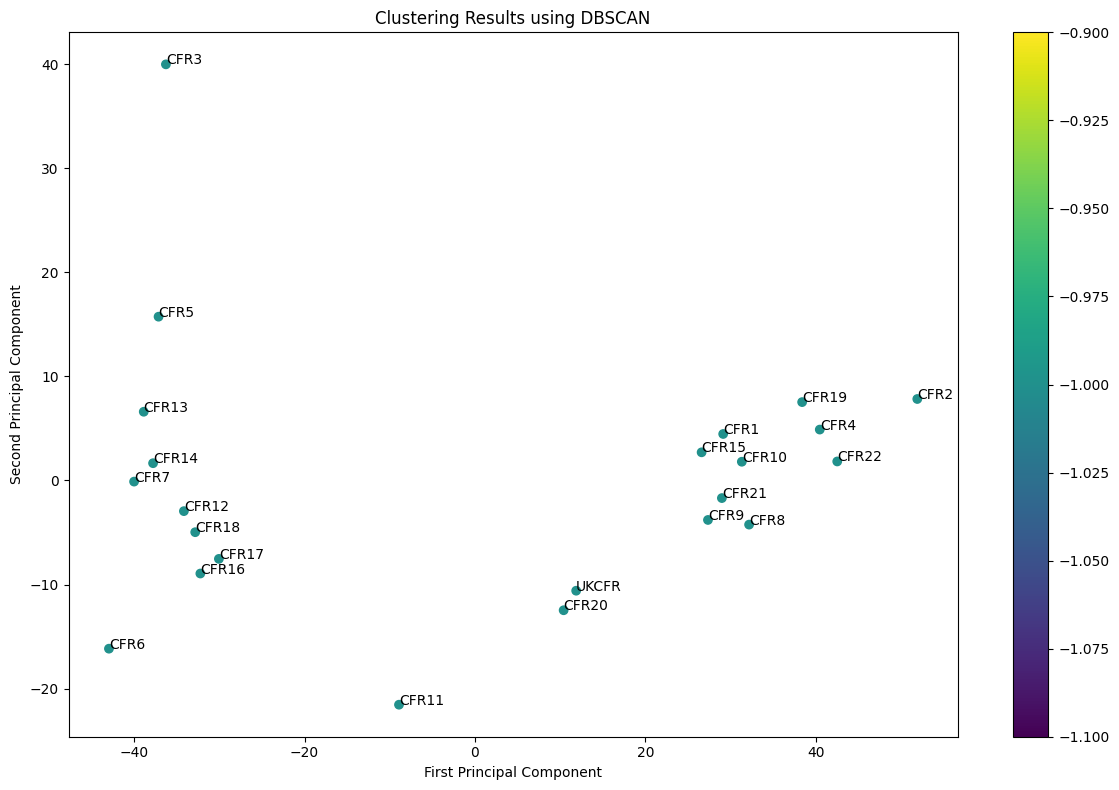


Results for Hierarchical:
Cluster assignments:
CFR1: Cluster 1
CFR14: Cluster 0
CFR12: Cluster 0
CFR16: Cluster 0
CFR13: Cluster 0
CFR3: Cluster 0
CFR21: Cluster 1
CFR19: Cluster 1
CFR8: Cluster 1
CFR20: Cluster 2
UKCFR: Cluster 2
CFR2: Cluster 1
CFR10: Cluster 1
CFR6: Cluster 0
CFR18: Cluster 0
CFR9: Cluster 1
CFR17: Cluster 0
CFR22: Cluster 1
CFR5: Cluster 0
CFR4: Cluster 1
CFR11: Cluster 2
CFR7: Cluster 0
CFR15: Cluster 1


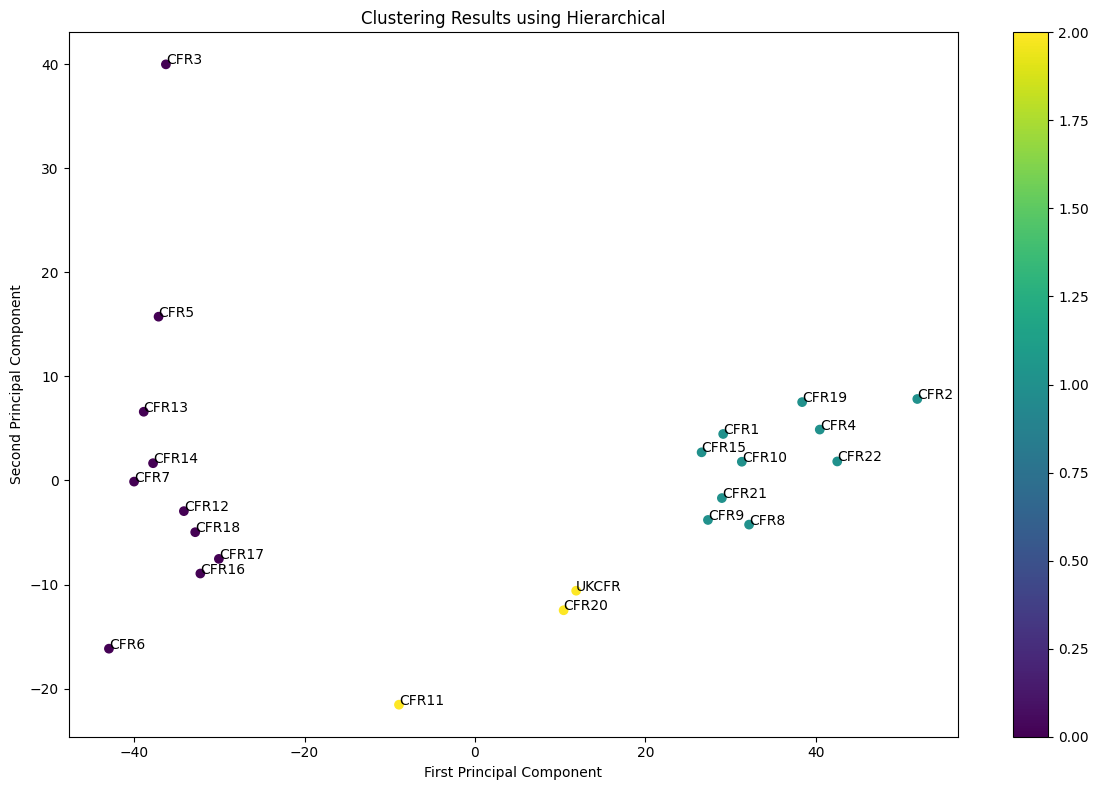

Silhouette Score for Hierarchical: 0.468

Results for Spectral:
Cluster assignments:
CFR1: Cluster 0
CFR14: Cluster 0
CFR12: Cluster 0
CFR16: Cluster 0
CFR13: Cluster 0
CFR3: Cluster 1
CFR21: Cluster 0
CFR19: Cluster 0
CFR8: Cluster 0
CFR20: Cluster 0
UKCFR: Cluster 0
CFR2: Cluster 0
CFR10: Cluster 0
CFR6: Cluster 0
CFR18: Cluster 0
CFR9: Cluster 2
CFR17: Cluster 0
CFR22: Cluster 0
CFR5: Cluster 0
CFR4: Cluster 0
CFR11: Cluster 0
CFR7: Cluster 0
CFR15: Cluster 0


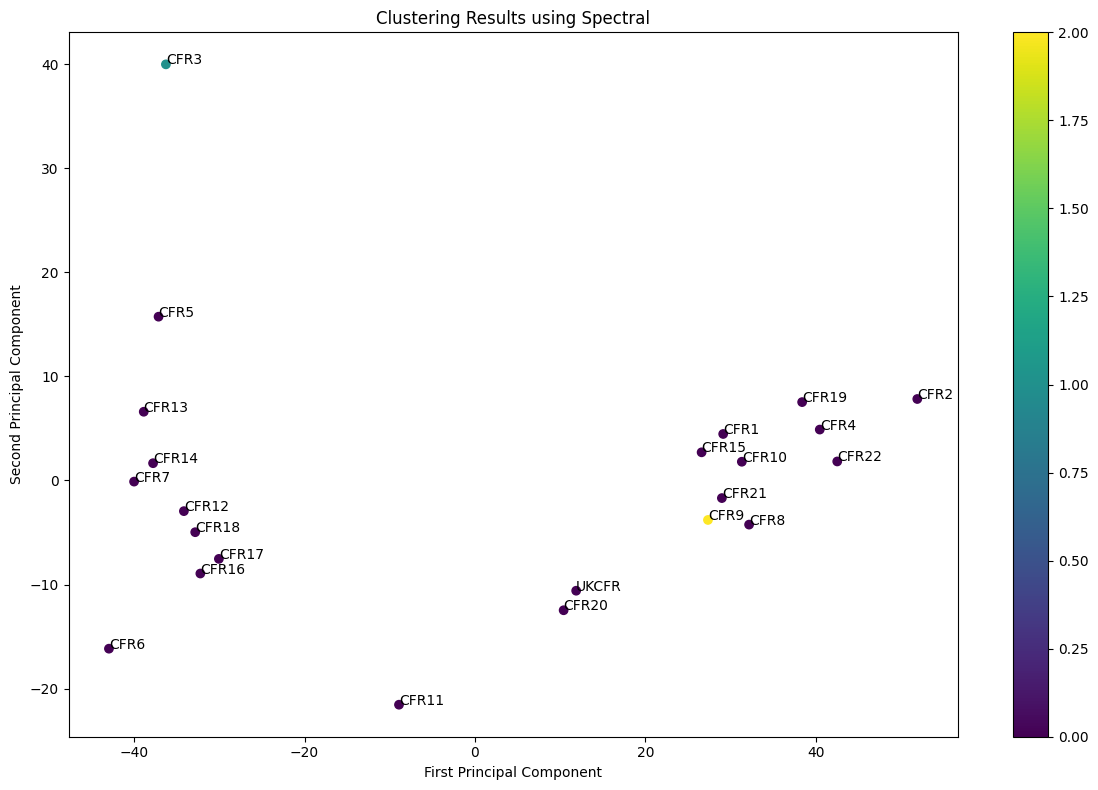

Silhouette Score for Spectral: -0.206

Results for Mean Shift:
Cluster assignments:
CFR1: Cluster 1
CFR14: Cluster 0
CFR12: Cluster 0
CFR16: Cluster 0
CFR13: Cluster 0
CFR3: Cluster 5
CFR21: Cluster 1
CFR19: Cluster 1
CFR8: Cluster 2
CFR20: Cluster 3
UKCFR: Cluster 3
CFR2: Cluster 4
CFR10: Cluster 1
CFR6: Cluster 0
CFR18: Cluster 0
CFR9: Cluster 6
CFR17: Cluster 0
CFR22: Cluster 2
CFR5: Cluster 0
CFR4: Cluster 1
CFR11: Cluster 7
CFR7: Cluster 0
CFR15: Cluster 2


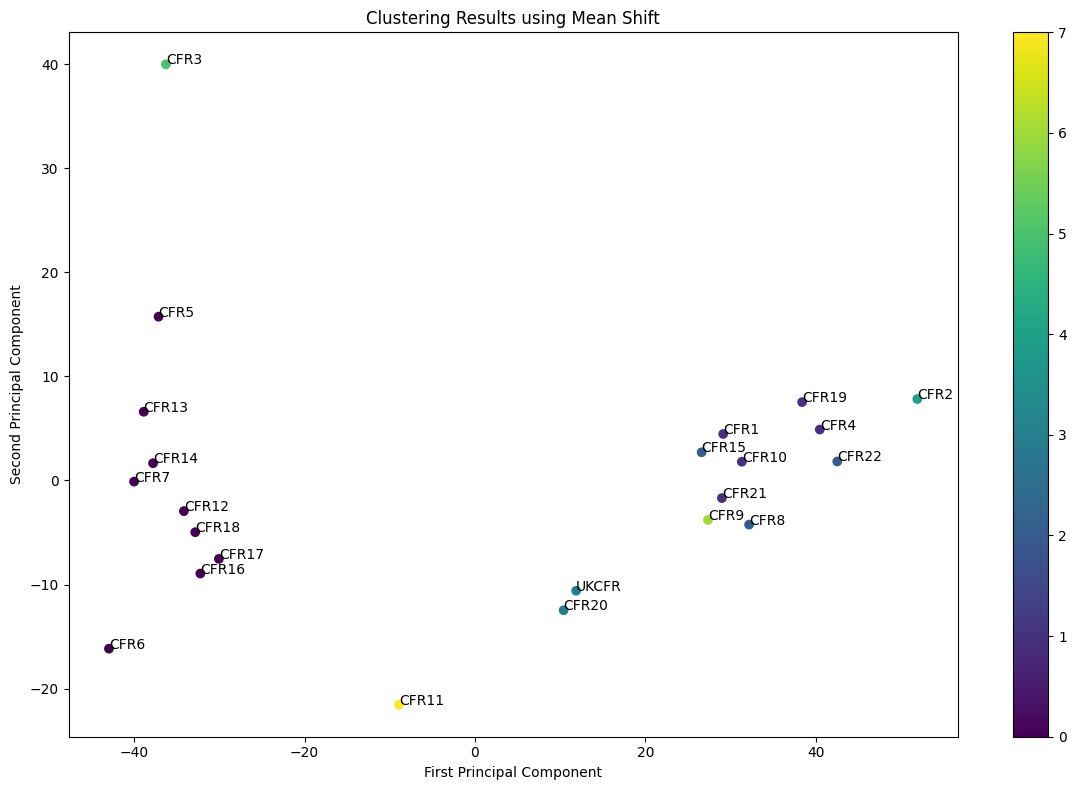

Silhouette Score for Mean Shift: 0.372

Results for Gaussian Mixture:
Cluster assignments:
CFR1: Cluster 0
CFR14: Cluster 1
CFR12: Cluster 1
CFR16: Cluster 1
CFR13: Cluster 1
CFR3: Cluster 2
CFR21: Cluster 0
CFR19: Cluster 0
CFR8: Cluster 0
CFR20: Cluster 0
UKCFR: Cluster 0
CFR2: Cluster 0
CFR10: Cluster 0
CFR6: Cluster 1
CFR18: Cluster 1
CFR9: Cluster 0
CFR17: Cluster 1
CFR22: Cluster 0
CFR5: Cluster 1
CFR4: Cluster 0
CFR11: Cluster 1
CFR7: Cluster 1
CFR15: Cluster 0


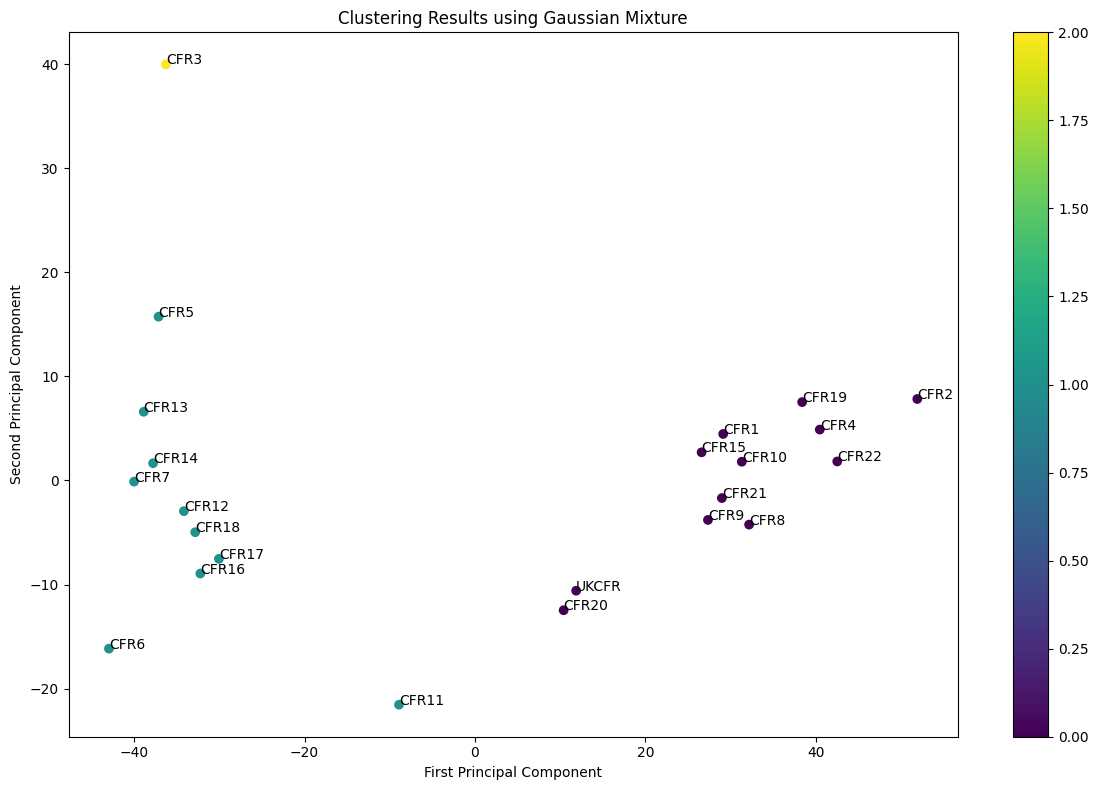

Silhouette Score for Gaussian Mixture: 0.539


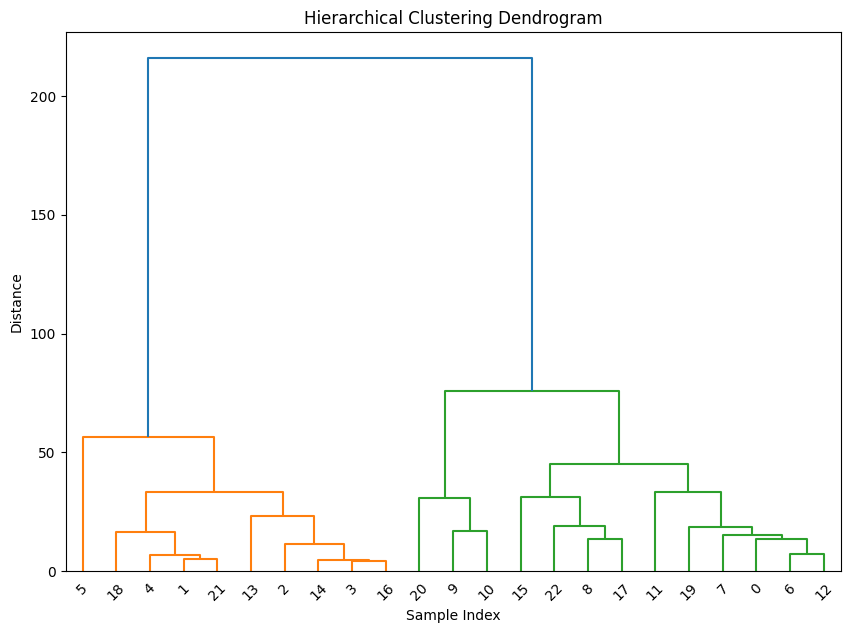

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    SpectralClustering,
    MeanShift,
    estimate_bandwidth
)
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import silhouette_score

class SpectralAnalyzer:
    def __init__(self, data):
        self.data = data
        self.scaler = StandardScaler()
        self.scaled_data = self.scaler.fit_transform(data.values.T)

    def perform_kmeans(self, n_clusters=3):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        return kmeans.fit_predict(self.scaled_data)

    def perform_dbscan(self, eps=0.5, min_samples=2):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        return dbscan.fit_predict(self.scaled_data)

    def perform_hierarchical(self, n_clusters=3, linkage_method='ward'):
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        return hierarchical.fit_predict(self.scaled_data)

    def perform_spectral(self, n_clusters=3):
        spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
        return spectral.fit_predict(self.scaled_data)

    def perform_meanshift(self):
        bandwidth = estimate_bandwidth(self.scaled_data, quantile=0.2)
        meanshift = MeanShift(bandwidth=bandwidth)
        return meanshift.fit_predict(self.scaled_data)

    def perform_gmm(self, n_components=3):
        gmm = GaussianMixture(n_components=n_components, random_state=42)
        return gmm.fit_predict(self.scaled_data)

    def plot_dendrogram(self):
        plt.figure(figsize=(10, 7))
        linkage_matrix = linkage(self.scaled_data, method='ward')
        dendrogram(linkage_matrix)
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

    def visualize_clusters(self, labels, method_name):
        # Reduce dimensionality for visualization
        pca = PCA(n_components=2)
        data_2d = pca.fit_transform(self.scaled_data)

        # Create visualization
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis')
        plt.title(f'Clustering Results using {method_name}')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.colorbar(scatter)

        # Add sample labels
        for i, sample in enumerate(self.data.columns):
            plt.annotate(sample, (data_2d[i, 0], data_2d[i, 1]))

        plt.tight_layout()
        plt.show()

        # Calculate and print silhouette score if more than one cluster
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1 and -1 not in unique_labels:  # Exclude DBSCAN's noise points
            score = silhouette_score(self.scaled_data, labels)
            print(f'Silhouette Score for {method_name}: {score:.3f}')

    def compare_methods(self):
        # Dictionary to store all clustering results
        clustering_results = {
            'K-means': self.perform_kmeans(),
            'DBSCAN': self.perform_dbscan(),
            'Hierarchical': self.perform_hierarchical(),
            'Spectral': self.perform_spectral(),
            'Mean Shift': self.perform_meanshift(),
            'Gaussian Mixture': self.perform_gmm()
        }

        # Visualize all results
        for method_name, labels in clustering_results.items():
            print(f"\nResults for {method_name}:")
            print("Cluster assignments:")
            for sample, cluster in zip(self.data.columns, labels):
                print(f"{sample}: Cluster {cluster}")
            self.visualize_clusters(labels, method_name)

        # Plot dendrogram for hierarchical clustering
        self.plot_dendrogram()

# Example usage
def main():
    # Load and filter your data as before
    file_path = "/content/merged_data_single.csv"
    df = pd.read_csv(file_path, index_col=0)

    # Filter data for specific ranges
    def filter_data(df):
        range1 = df.loc[3000:2800]
        range2 = df.loc[1750:1650]
        range3 = df.loc[1500:400]
        return pd.concat([range1, range2, range3])

    df_filtered = filter_data(df)

    # Create analyzer instance and compare methods
    analyzer = SpectralAnalyzer(df_filtered)
    analyzer.compare_methods()

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


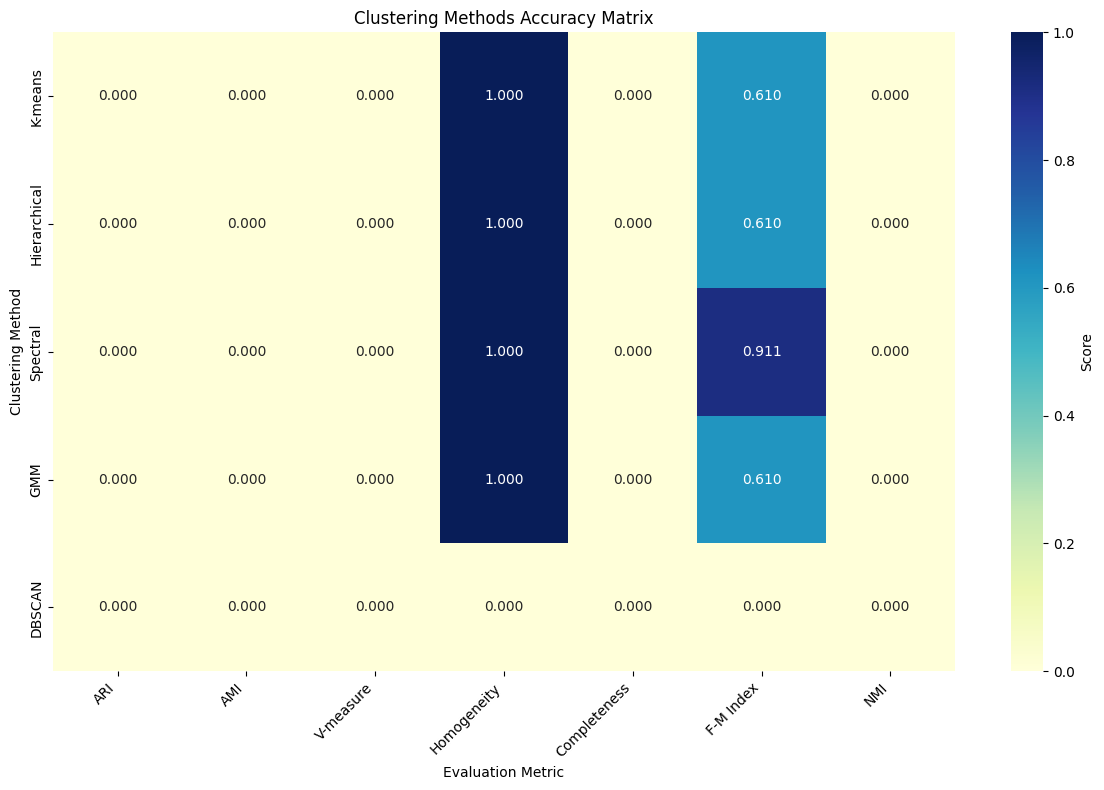


Summary Statistics:
              Mean Score  Max Score  Min Score  Std Dev
K-means            0.230        1.0        0.0    0.409
Hierarchical       0.230        1.0        0.0    0.409
Spectral           0.273        1.0        0.0    0.467
GMM                0.230        1.0        0.0    0.409
DBSCAN             0.000        0.0        0.0    0.000

Best Method per Metric:
             Best Method  Score
ARI              K-means  0.000
AMI              K-means  0.000
V-measure        K-means  0.000
Homogeneity      K-means  1.000
Completeness     K-means  0.000
F-M Index       Spectral  0.911
NMI              K-means  0.000

Detailed results saved to 'clustering_accuracy_matrix.csv'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    adjusted_rand_score,
    adjusted_mutual_info_score,
    v_measure_score,
    homogeneity_score,
    completeness_score,
    fowlkes_mallows_score,
    normalized_mutual_info_score
)
import matplotlib.pyplot as plt
import seaborn as sns

class ClusteringAccuracyMatrix:
    def __init__(self, data):
        self.data = data
        self.scaler = StandardScaler()
        self.scaled_data = self.scaler.fit_transform(data.values.T)
        self.manual_labels = self._create_manual_labels()

    def _create_manual_labels(self):
        manual_groups = {
            'group1': ['N5', 'N6', 'N7'],
            'group2': ['N3', 'N12', 'N13', 'N14', 'N16', 'N17', 'N18'],
            'group3': ['N1', 'N2', 'N4', 'N8', 'N9', 'N10', 'N11', 'N15',
                      'N19', 'N20', 'N21', 'N22', 'UKCF']
        }

        labels = []
        for sample in self.data.columns:
            if sample in manual_groups['group1']:
                labels.append(0)
            elif sample in manual_groups['group2']:
                labels.append(1)
            else:
                labels.append(2)
        return np.array(labels)

    def perform_clustering(self, n_clusters=3):
        methods = {
            'K-means': KMeans(n_clusters=n_clusters, random_state=42),
            'Hierarchical': AgglomerativeClustering(n_clusters=n_clusters),
            'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42),
            'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=2)
        }

        results = {}
        for name, method in methods.items():
            results[name] = method.fit_predict(self.scaled_data)

        return results

    def calculate_metrics(self, clustering_results):
        metrics = {
            'ARI': adjusted_rand_score,
            'AMI': adjusted_mutual_info_score,
            'V-measure': v_measure_score,
            'Homogeneity': homogeneity_score,
            'Completeness': completeness_score,
            'F-M Index': fowlkes_mallows_score,
            'NMI': normalized_mutual_info_score
        }

        # Initialize results array with zeros
        results_array = np.zeros((len(clustering_results), len(metrics)))
        methods = list(clustering_results.keys())
        metric_names = list(metrics.keys())

        for i, (method_name, labels) in enumerate(clustering_results.items()):
            if len(np.unique(labels)) > 1:  # Skip if all samples assigned to same cluster
                for j, (metric_name, metric_func) in enumerate(metrics.items()):
                    try:
                        score = metric_func(self.manual_labels, labels)
                        results_array[i, j] = score
                    except:
                        results_array[i, j] = np.nan

        # Convert to DataFrame
        results_df = pd.DataFrame(
            data=results_array,
            index=methods,
            columns=metric_names
        )

        return results_df

    def plot_accuracy_matrix(self, accuracy_df):
        plt.figure(figsize=(12, 8))

        # Convert DataFrame to numpy array of floats
        accuracy_matrix = accuracy_df.astype(float)

        # Create heatmap
        sns.heatmap(accuracy_matrix,
                   annot=True,
                   cmap='YlGnBu',
                   fmt='.3f',
                   cbar_kws={'label': 'Score'})

        plt.title('Clustering Methods Accuracy Matrix')
        plt.ylabel('Clustering Method')
        plt.xlabel('Evaluation Metric')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def generate_summary_table(self, accuracy_df):
        # Convert to float type for calculations
        accuracy_df = accuracy_df.astype(float)

        summary = pd.DataFrame(index=accuracy_df.index)
        summary['Mean Score'] = accuracy_df.mean(axis=1)
        summary['Max Score'] = accuracy_df.max(axis=1)
        summary['Min Score'] = accuracy_df.min(axis=1)
        summary['Std Dev'] = accuracy_df.std(axis=1)

        print("\nSummary Statistics:")
        print("===================")
        print(summary.round(3))

        # Find best method for each metric
        best_methods = pd.DataFrame(index=accuracy_df.columns)
        best_methods['Best Method'] = accuracy_df.idxmax()
        best_methods['Score'] = accuracy_df.max()

        print("\nBest Method per Metric:")
        print("=======================")
        print(best_methods.round(3))

def main():
    try:
        # Load your spectral data
        file_path = "/content/merged_data_single.csv"  # Update with your file path
        df = pd.read_csv(file_path, index_col=0)

        # Create analyzer instance
        analyzer = ClusteringAccuracyMatrix(df)

        # Perform clustering with different methods
        clustering_results = analyzer.perform_clustering()

        # Calculate accuracy metrics
        accuracy_matrix = analyzer.calculate_metrics(clustering_results)

        # Plot accuracy matrix
        analyzer.plot_accuracy_matrix(accuracy_matrix)

        # Generate and print summary statistics
        analyzer.generate_summary_table(accuracy_matrix)

        # Save results to CSV
        accuracy_matrix.to_csv('clustering_accuracy_matrix.csv')
        print("\nDetailed results saved to 'clustering_accuracy_matrix.csv'")

    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

if __name__ == "__main__":
    main()